<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Machine-Learning/blob/main/02_Feature_Engineering/21_PCA_Implementation_on_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA Implementation on MNIST Data**

## **Import Required Libraries**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## **Read the Data from Kaggle**

In [ ]:
%mkdir ~/.kaggle
%cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d animatronbot/mnist-digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 42.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 64.9MB/s]


In [ ]:
# Extract the data from Zipfile
import zipfile
zipref = zipfile.ZipFile("/content/mnist-digit-recognizer.zip")
zipref.extractall("/content")
zipref.close()

In [ ]:
# Read the data
df = pd.read_csv("/content/train.csv")
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Plot the Data**

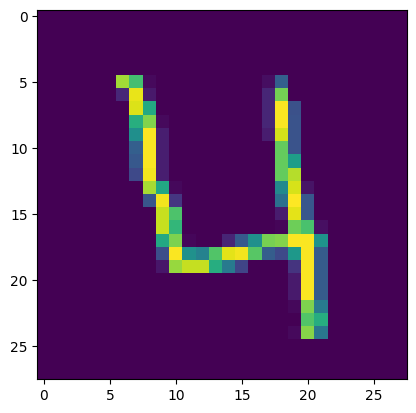

In [ ]:
plt.imshow(df.iloc[3][1:].values.reshape(28, 28))
plt.show()

## **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df.iloc[:, 0],
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape

((29400, 784), (12600, 784))

## **Apply K-Nearest Neighbour Classifier**

In [ ]:
# Apply Standardization
scaler = StandardScaler()

# Fit and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instantiate a 'KNeighborsClassifier' object
knn = KNeighborsClassifier()

# Fit the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the test data
start = time.time()
y_pred = knn.predict(X_test_scaled)
print("Time taken:", time.time() - start, "Sec")

Time taken: 32.01050662994385 Sec


In [ ]:
# Check the accuracy score
accuracy_score(y_test, y_pred).round(2)

0.94

## **Apply PCA before Classification**

In [ ]:
# Instantiate a PCA object
pca = PCA(n_components=200)

# Fit and transform the training data
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [ ]:
X_train_transformed.shape

(29400, 200)

In [ ]:
# Instantiate a 'KNeighborsClassifier' object
knn = KNeighborsClassifier()

# Fit the transformed training data
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the transformed test data
start = time.time()
y_pred = knn.predict(X_test_transformed)
print("Time taken:", time.time() - start, "Sec")

Time taken: 12.566871404647827 Sec


In [ ]:
# Check the accuracy score
accuracy_score(y_test, y_pred).round(2)

0.95

In [ ]:
X_train_scaled.shape

(29400, 784)

In [ ]:
# # Store the accuracy based on number of principal components in a dictionary
# # **This process might take time**
# accuracy_dict = {}

# for i in range(1, 785):
#     print("No. of PC:", i)

#     pca = PCA(n_components=i)

#     X_train_transformed = pca.fit_transform(X_train_scaled)
#     X_test_transformed = pca.transform(X_test_scaled)

#     knn = KNeighborsClassifier()
#     knn.fit(X_train_transformed, y_train)

#     y_pred = knn.predict(X_test_transformed)
#     accuracy = accuracy_score(y_test, y_pred)

#     accuracy_dict[i] = accuracy

In [ ]:
# sns.lineplot(pd.Series(accuracy_dict), marker="o")
# plt.grid()
# plt.xlabel("No. of Principal Components")
# plt.ylabel("Accuracy")
# plt.show()

## **Data Visualization**

### **2D Visualization**

In [ ]:
# Transforming the data into a 2D coordinate system
pca = PCA(n_components=2)

X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [ ]:
X_train_transformed

array([[-6.50545309,  2.71958938],
       [-0.18910747, -2.65092736],
       [ 4.91160061,  8.57419549],
       ...,
       [ 2.08019957,  0.82253269],
       [ 0.97779591,  1.01748517],
       [17.74329931,  1.83855395]])

In [ ]:
fig = px.scatter(x=X_train_transformed[:, 0],
                 y=X_train_transformed[:, 1],
                 color=y_train.astype("str"),
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='black')))

fig.show()

### **3D Visualization**

In [ ]:
# Transforming the data into a 2D coordinate system
pca = PCA(n_components=3)

X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [ ]:
X_train_transformed

array([[-6.50549158,  2.71989816, -0.39200607],
       [-0.18900624, -2.65113714, -0.90477529],
       [ 4.911688  ,  8.57400093, -0.74865532],
       ...,
       [ 2.08011889,  0.82281484, -0.73315134],
       [ 0.97778305,  1.01710061,  3.93868092],
       [17.74318756,  1.83830412, -4.94132198]])

In [ ]:
fig = px.scatter_3d(x=X_train_transformed[:, 0],
                    y=X_train_transformed[:, 1],
                    z=X_train_transformed[:, 2],
                    color=y_train.astype("str"),
                    color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color="black")))
fig.update_layout(width=800, height=600)

fig.show()

## **Check Eigen Values and Eigen Vectors**

In [ ]:
# Print the Eigen Values
print("Eigen Values:")
pca.explained_variance_

Eigen Values:


array([40.88572671, 29.24344588, 26.65306568])

In [ ]:
# Print the Eigen Vectors
print("Eigen Vectors:")
print(pca.components_.shape)
pca.components_

Eigen Vectors:
(3, 784)


array([[-1.06249687e-18, -2.80652050e-20, -1.30086014e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.18752720e-17, -3.18607618e-18, -7.37232291e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.42819199e-17,  4.58776299e-18,  4.99774022e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## **Find Optimum Number of Principal Components**

In [ ]:
# Check the percent of variance explained by first 3 principal components
pca.explained_variance_ratio_

array([0.05848975, 0.04183469, 0.03812898])

In [ ]:
# Apply PCA
pca = PCA(n_components=None)

X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

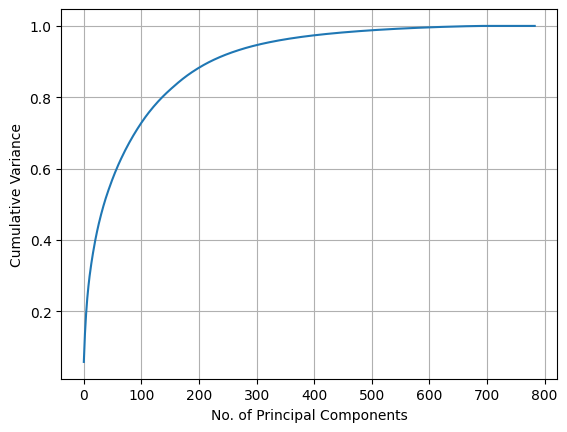

In [ ]:
sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of Principal Components")
plt.ylabel("Cumulative Variance")
plt.grid()
plt.show()